                                    #### BUSINESS PROBLEM-1####

In [18]:
import pandas as pd

# Load the dataset
loans_data = pd.read_csv("LoansData.csv")

# Display the first few rows of the dataset
print(loans_data.head())

# Check the data types and missing values
print(loans_data.isnull().sum())
print(loans_data.dtypes)


   Amount.Requested  Amount.Funded.By.Investors Interest.Rate Loan.Length  \
0           20000.0                     20000.0         8.90%   36 months   
1           19200.0                     19200.0        12.12%   36 months   
2           35000.0                     35000.0        21.98%   60 months   
3           10000.0                      9975.0         9.99%   36 months   
4           12000.0                     12000.0        11.71%   36 months   

         Loan.Purpose Debt.To.Income.Ratio State Home.Ownership  \
0  debt_consolidation               14.90%    SC       MORTGAGE   
1  debt_consolidation               28.36%    TX       MORTGAGE   
2  debt_consolidation               23.81%    CA       MORTGAGE   
3  debt_consolidation               14.30%    KS       MORTGAGE   
4         credit_card               18.78%    NJ           RENT   

   Monthly.Income FICO.Range  Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
0         6541.67    735-739               14.0          

In [30]:
# Fill missing values for categorical columns with mode
categorical_cols = ['Loan.Length', 'Loan.Purpose', 'State', 'Home.Ownership', 'Employment.Length']
loans_data[categorical_cols] = loans_data[categorical_cols].fillna(loans_data[categorical_cols].mode().iloc[0])

# Convert 'Interest.Rate' column to float
loans_data['Interest.Rate'] = loans_data['Interest.Rate'].astype(float)

# Convert 'Debt.To.Income.Ratio' column to float
loans_data['Debt.To.Income.Ratio'] = loans_data['Debt.To.Income.Ratio'].astype(float)

print(loans_data.dtypes)




Amount.Requested                  float64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                         int32
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
State                              object
Home.Ownership                     object
Monthly.Income                    float64
FICO.Range                         object
Open.CREDIT.Lines                 float64
Revolving.CREDIT.Balance          float64
Inquiries.in.the.Last.6.Months    float64
Employment.Length                  object
dtype: object


In [33]:
# Step 1: Fill missing values in 'FICO.Range' column with a placeholder value
loans_data['FICO.Range'].fillna('0-0', inplace=True)

# Step 2: Split the 'FICO.Range' column into two separate columns 'FICO_min' and 'FICO_max'
loans_data[['FICO_min', 'FICO_max']] = loans_data['FICO.Range'].str.split('-', expand=True)

# Step 3: Convert the values in 'FICO_min' and 'FICO_max' columns to integers
loans_data['FICO_min'] = loans_data['FICO_min'].astype(int)
loans_data['FICO_max'] = loans_data['FICO_max'].astype(int)

# Drop the original 'FICO.Range' column
loans_data.drop(columns=['FICO.Range'], inplace=True)


In [34]:
loans_data.head()


Amount.Requested  Amount.Funded.By.Investors  Interest.Rate  Loan.Length  \
0           20000.0                     20000.0           8.90           36   
1           19200.0                     19200.0          12.12           36   
2           35000.0                     35000.0          21.98           60   
3           10000.0                      9975.0           9.99           36   
4           12000.0                     12000.0          11.71           36   

         Loan.Purpose  Debt.To.Income.Ratio State Home.Ownership  \
0  debt_consolidation                 14.90    SC       MORTGAGE   
1  debt_consolidation                 28.36    TX       MORTGAGE   
2  debt_consolidation                 23.81    CA       MORTGAGE   
3  debt_consolidation                 14.30    KS       MORTGAGE   
4         credit_card                 18.78    NJ           RENT   

   Monthly.Income  Open.CREDIT.Lines  Revolving.CREDIT.Balance  \
0         6541.67               14.0                   14272.0   
1         4583.33               12.0                   11140.0   
2        11500.00               14.0                   21977.0   
3         3833.33               10.0                    9346.0   
4         3195.00               11.0                   14469.0   

   Inquiries.in.the.Last.6.Months Employment.Length  FICO_min  FICO_max  
0                             2.0          < 1 year       735       739  
1                             1.0           2 years       715       719  
2                             1.0           2 years       690       694  
3                             0.0           5 years       695       699  
4                             0.0           9 years       695       699

In [37]:
# Check unique values and missing values in 'Interest.Rate' and 'Amount.Requested' columns
unique_interest_rates = loans_data['Interest.Rate'].unique()
unique_loan_amounts = loans_data['Amount.Requested'].unique()

missing_interest_rates = loans_data['Interest.Rate'].isnull().sum()
missing_loan_amounts = loans_data['Amount.Requested'].isnull().sum()

print("Unique interest rates:", unique_interest_rates)
print("Unique loan amounts:", unique_loan_amounts)
print("Number of missing values in 'Interest.Rate':", missing_interest_rates)
print("Number of missing values in 'Amount.Requested':", missing_loan_amounts)


Unique interest rates: [ 8.9  12.12 21.98  9.99 11.71 15.31  7.9  17.14 14.33  6.91 19.72 14.27
 21.67  7.62 15.65 10.37  9.76 19.05 17.99 11.99 16.82 14.42  8.59 21.
 16.49 15.8  13.55 12.49 17.27 11.14 19.13 21.74 11.86 10.38 23.91  7.49
 17.44 21.49 17.8  12.98 11.49 10.16  9.91 13.11 16.29 18.25 14.09 19.03
 11.83 13.12  6.76 10.83 17.77 13.06 11.12  7.51 15.81 14.35 14.96  6.62
  5.99 18.75 21.48 10.65  6.03  6.17 13.99 10.99  7.66  8.49 15.21 14.65
 10.74 15.7  16.32 14.07 16.4   5.79  9.88 15.99 23.28  9.63 14.11 10.75
 16.69 13.98 10.91 11.48 13.49  6.92 12.53 15.27 15.23 21.28 12.69 16.89
 18.49 19.47 10.59  7.88 14.83  8.   10.    8.94 22.47 18.67 24.89 19.91
 20.77 12.84 13.67  6.99  7.74 11.03 15.57 14.59  9.62 20.5  10.36 17.49
 11.54 14.12 19.99 12.92 12.99 20.49 15.96 10.46 14.22  5.42 22.78 11.11
 17.04 12.61 18.17  7.43 22.95 16.77 16.7  14.91 19.42 10.25  7.29 12.29
 12.68 13.85 12.42 12.87 16.63 14.84 11.97 17.43 16.   12.21 13.16 11.36
  7.14  9.32 18.62 14.18 11.89

In [38]:
# Impute missing values in 'Interest.Rate' with the mean interest rate
mean_interest_rate = loans_data['Interest.Rate'].mean()
loans_data['Interest.Rate'].fillna(mean_interest_rate, inplace=True)

# Impute missing values in 'Amount.Requested' with the mean loan amount
mean_loan_amount = loans_data['Amount.Requested'].mean()
loans_data['Amount.Requested'].fillna(mean_loan_amount, inplace=True)




In [39]:
from scipy.stats import f_oneway

# Group interest rates by loan amounts
loan_amount_groups = loans_data.groupby('Amount.Requested')

# Extract interest rates for each loan amount group
interest_rates_by_amount = [group['Interest.Rate'] for _, group in loan_amount_groups]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*interest_rates_by_amount)

# Interpret the results
alpha = 0.05
print("Results of ANOVA test:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

if p_value < alpha:
    print("Reject Null Hypothesis (H0): Interest rate varies for different loan amounts.")
else:
    print("Fail to reject Null Hypothesis (H0): Interest rate is the same for all loan amounts.")


Results of ANOVA test:
F-statistic: 2.044344737242963
P-value: 3.64953831127363e-23
Reject Null Hypothesis (H0): Interest rate varies for different loan amounts.


In [40]:
from scipy.stats import f_oneway

# Group interest rates by loan length
loan_length_groups = loans_data.groupby('Loan.Length')
interest_rates_by_length = [group['Interest.Rate'] for _, group in loan_length_groups]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*interest_rates_by_length)

# Interpret the results
print("Results of ANOVA test:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Check significance level
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis (H0): Interest rate varies for different loan lengths.")
else:
    print("Fail to reject Null Hypothesis (H0): Interest rate is the same for all loan lengths.")


Results of ANOVA test:
F-statistic: 548.0510530961667
P-value: 9.549596064335764e-110
Reject Null Hypothesis (H0): Interest rate varies for different loan lengths.


In [41]:
# Group interest rates by loan purpose
loan_purpose_groups = loans_data.groupby('Loan.Purpose')
interest_rates_by_purpose = [group['Interest.Rate'] for _, group in loan_purpose_groups]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*interest_rates_by_purpose)

# Interpret the results
print("Results of ANOVA test:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Check significance level
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis (H0): Interest rate varies for different loan purposes.")
else:
    print("Fail to reject Null Hypothesis (H0): Interest rate is the same for all loan purposes.")


Results of ANOVA test:
F-statistic: 7.4826387840974355
P-value: 1.1599665535989115e-14
Reject Null Hypothesis (H0): Interest rate varies for different loan purposes.


In [42]:
from scipy.stats import chi2_contingency

# Create a contingency table between FICO Range and Home Ownership
contingency_table = pd.crosstab(loans_data['FICO.Range'], loans_data['Home.Ownership'])

# Perform chi-square test of independence
chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)

# Interpret the results
print("Results of Chi-square test:")
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_val)

# Check significance level
alpha = 0.05
if p_val < alpha:
    print("Reject Null Hypothesis (H0): There is a relationship between FICO scores and Home Ownership.")
else:
    print("Fail to reject Null Hypothesis (H0): There is no relationship between FICO scores and Home Ownership.")


Results of Chi-square test:
Chi-square statistic: 473.05246368346025
P-value: 1.2021592010244615e-35
Reject Null Hypothesis (H0): There is a relationship between FICO scores and Home Ownership.


In [43]:
from scipy.stats import f_oneway

# Group the data by loan purpose
loan_purpose_groups = loans_data.groupby('Loan.Purpose')

# Extract interest rates for each group
interest_rates_by_purpose = [group['Interest.Rate'] for _, group in loan_purpose_groups]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*interest_rates_by_purpose)

# Interpret the results
print("Results of ANOVA test:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Check significance level
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis (H0): Interest rates vary for different loan purposes.")
else:
    print("Fail to reject Null Hypothesis (H0): Interest rates do not vary significantly for different loan purposes.")


Results of ANOVA test:
F-statistic: 7.4826387840974355
P-value: 1.1599665535989115e-14
Reject Null Hypothesis (H0): Interest rates vary for different loan purposes.


In [44]:
from scipy.stats import chi2_contingency

# Create a contingency table of frequencies
contingency_table = pd.crosstab(loans_data['FICO.Range'], loans_data['Home.Ownership'])

# Perform chi-square test
chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)

# Interpret the results
print("Results of Chi-square test:")
print("Chi-square statistic:", chi2_stat)
print("P-value:", p_value)

# Check significance level
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis (H0): There is a significant association between FICO scores and home ownership.")
else:
    print("Fail to reject Null Hypothesis (H0): There is no significant association between FICO scores and home ownership.")


Results of Chi-square test:
Chi-square statistic: 473.05246368346025
P-value: 1.2021592010244615e-35
Reject Null Hypothesis (H0): There is a significant association between FICO scores and home ownership.


In [45]:
from scipy.stats import f_oneway

# Group the data by loan purpose
loan_purpose_groups = loans_data.groupby('Loan.Purpose')

# Extract interest rates for each group
interest_rates_by_purpose = [group['Interest.Rate'] for _, group in loan_purpose_groups]

# Perform ANOVA test
f_statistic, p_value = f_oneway(*interest_rates_by_purpose)

# Interpret the results
print("Results of ANOVA test:")
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Check significance level
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis (H0): There is a significant relationship between loan purpose and interest rates.")
else:
    print("Fail to reject Null Hypothesis (H0): There is no significant relationship between loan purpose and interest rates.")


Results of ANOVA test:
F-statistic: 7.4826387840974355
P-value: 1.1599665535989115e-14
Reject Null Hypothesis (H0): There is a significant relationship between loan purpose and interest rates.


In [48]:
print(loans_data.columns)


Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')


In [52]:
# Split the dataset into two groups based on home ownership
own_home = loans_data[loans_data['Home.Ownership'] == 'OWN']
rent_or_mortgage = loans_data[loans_data['Home.Ownership'].isin(['RENT', 'MORTGAGE'])]

# Extract FICO scores for each group
fico_own_home = own_home['FICO.Range']
fico_rent_or_mortgage = rent_or_mortgage['FICO.Range']

from scipy.stats import ttest_ind

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(fico_own_home, fico_rent_or_mortgage, equal_var=False)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis (H0): There is a significant difference in FICO scores based on home ownership.")
else:
    print("Fail to reject Null Hypothesis (H0): There is no significant difference in FICO scores based on home ownership.")


Fail to reject Null Hypothesis (H0): There is no significant difference in FICO scores based on home ownership.


In [54]:
# Split the 'FICO.Range' column into two separate columns 'FICO_min' and 'FICO_max'
loans_data[['FICO_min', 'FICO_max']] = loans_data['FICO.Range'].str.split('-', expand=True)

# Convert the values in 'FICO_min' and 'FICO_max' columns to integers, handling missing values
loans_data['FICO_min'] = pd.to_numeric(loans_data['FICO_min'], errors='coerce')
loans_data['FICO_max'] = pd.to_numeric(loans_data['FICO_max'], errors='coerce')

# Drop rows with missing values in 'FICO_min' or 'FICO_max'
loans_data.dropna(subset=['FICO_min', 'FICO_max'], inplace=True)



In [57]:
# Convert FICO scores to numeric values
loans_data[['FICO_min', 'FICO_max']] = loans_data['FICO.Range'].str.split('-', expand=True)
loans_data['FICO_min'] = loans_data['FICO_min'].astype(int)

# Split the dataset into two groups based on home ownership
own_home = loans_data[loans_data['Home.Ownership'] == 'OWN']
rent_or_mortgage = loans_data[loans_data['Home.Ownership'].isin(['RENT', 'MORTGAGE'])]

# Extract the FICO scores for each group
fico_own_home = own_home['FICO_min']
fico_rent_or_mortgage = rent_or_mortgage['FICO_min']

# Perform a two-sample t-test
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(fico_own_home, fico_rent_or_mortgage, equal_var=False)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis (H0): There is a significant difference in FICO scores based on home ownership.")
else:
    print("Fail to reject Null Hypothesis (H0): There is no significant difference in FICO scores based on home ownership.")


Fail to reject Null Hypothesis (H0): There is no significant difference in FICO scores based on home ownership.


 
 
                                                    ####BUSINESS PROBLEM-2####
 
 

In [58]:
import pandas as pd

# Load the dataset
price_quotes_df = pd.read_csv("Price_Quotes.csv")

# Display the first few rows of the dataset to understand its structure
price_quotes_df.head()


Order_Number  Barry_Price  Mary_Price
0             1          126         114
1             2          110         118
2             3          138         114
3             4          142         111
4             5          146         129

In [59]:
import pandas as pd

# Load the dataset
data = {
    "Order_Number": [1, 2, 3, 4, 5],
    "Barry_Price": [126, 110, 138, 142, 146],
    "Mary_Price": [114, 118, 114, 111, 129]
}

df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
print(df.head())


   Order_Number  Barry_Price  Mary_Price
0             1          126         114
1             2          110         118
2             3          138         114
3             4          142         111
4             5          146         129


In [60]:
from scipy.stats import ttest_ind

# Extract price quotes provided by Mary and Barry
mary_quotes = df['Mary_Price']
barry_quotes = df['Barry_Price']

# Perform the two-sample t-test
t_statistic, p_value = ttest_ind(mary_quotes, barry_quotes)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis (H0): There is a significant difference in the average price quotes provided by Mary and Barry.")
else:
    print("Fail to reject Null Hypothesis (H0): There is no significant difference in the average price quotes provided by Mary and Barry.")


Fail to reject Null Hypothesis (H0): There is no significant difference in the average price quotes provided by Mary and Barry.


                                            
                                            
                                            #### Business Problem-3####

In [90]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind

# Load the dataset
Price_Quotes_data = pd.read_csv("Price_Quotes.csv")
Price_Quotes_data


Order_Number  Barry_Price  Mary_Price
0              1          126         114
1              2          110         118
2              3          138         114
3              4          142         111
4              5          146         129
5              6          136         119
6              7           94          97
7              8          103         104
8              9          140         127
9             10          152         133
10            11          108         103
11            12           97         108

In [92]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the dataset
Price_Quotes_data = pd.read_csv("Price_Quotes.csv")

# Check the first few rows of the dataset
print(Price_Quotes_data.head())

# Descriptive statistics
stats = Price_Quotes_data.describe()
print("\nDescriptive Statistics:")
print(stats)

# Visualize trends over time
plt.figure(figsize=(10, 6))

plt.plot(Price_Quotes_data.index, Price_Quotes_data['Barry_Price'], label='Barry Price')
plt.plot(Price_Quotes_data.index, Price_Quotes_data['Mary_Price'], label='Mary Price')

plt.xlabel('Order Number')
plt.ylabel('Price')
plt.title('Trends in Barry Price and Mary Price')
plt.legend()
plt.grid(True)
plt.show()

# Hypothesis testing (t-tests)
t_stat_barry, p_val_barry = ttest_ind(Price_Quotes_data['Barry_Price'], Price_Quotes_data['Mary_Price'])

print("\nHypothesis Testing Results:")
print("Barry Price vs. Mary Price - t-statistic:", t_stat_barry, "p-value:", p_val_barry)


   Order_Number  Barry_Price  Mary_Price
0             1          126         114
1             2          110         118
2             3          138         114
3             4          142         111
4             5          146         129

Descriptive Statistics:
       Order_Number  Barry_Price  Mary_Price
count     12.000000    12.000000   12.000000
mean       6.500000   124.333333  114.750000
std        3.605551    20.698412   11.054616
min        1.000000    94.000000   97.000000
25%        3.750000   106.750000  107.000000
50%        6.500000   131.000000  114.000000
75%        9.250000   140.500000  121.000000
max       12.000000   152.000000  133.000000



Hypothesis Testing Results:
Barry Price vs. Mary Price - t-statistic: 1.4147436739281787 p-value: 0.17114226132118285


                                            
                                            
                                            ####Business Problem-4####

In [62]:
import pandas as pd

# File path
file_path = "Priority_Assessment.csv"

# Load the CSV file into a DataFrame
Priority_Assessment_df = pd.read_csv(file_path)


Priority_Assessment_df

Days Priority
0     3.3     High
1     7.9   Medium
2     0.3     High
3     0.7   Medium
4     8.6   Medium
..    ...      ...
637   2.5      Low
638   0.3     High
639   0.3   Medium
640   1.3   Medium
641   0.5     High

[642 rows x 2 columns]

In [63]:


# Display the first few rows of the dataset
print(Priority_Assessment_df.head())


   Days Priority
0   3.3     High
1   7.9   Medium
2   0.3     High
3   0.7   Medium
4   8.6   Medium


In [64]:
# Calculate the mean completion time for each priority level
mean_completion_time = Priority_Assessment_df.groupby('Priority')['Days'].mean()

print(mean_completion_time)

Priority
High      3.023620
Low       4.228358
Medium    2.500000
Name: Days, dtype: float64


In [65]:
import pandas as pd
from scipy.stats import f_oneway

# Load the dataset
data = pd.read_csv('Priority_Assessment.csv')

# Split the dataset into groups based on priority level
high_priority = data[data['Priority'] == 'High']['Days']
medium_priority = data[data['Priority'] == 'Medium']['Days']
low_priority = data[data['Priority'] == 'Low']['Days']

# Perform ANOVA test
f_statistic, p_value = f_oneway(high_priority, medium_priority, low_priority)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject Null Hypothesis (H0): There is a significant difference in completion times among different priority levels.")
else:
    print("Fail to reject Null Hypothesis (H0): There is no significant difference in completion times among different priority levels.")

# Print F-statistic and p-value
print("F-statistic:", f_statistic)
print("P-value:", p_value)


Fail to reject Null Hypothesis (H0): There is no significant difference in completion times among different priority levels.
F-statistic: 1.812311010076072
P-value: 0.16411459461716182


In [66]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Priority_Assessment.csv")

# Display the first few rows of the dataset
print(data.head())

# Calculate the average completion time for each priority level
average_completion_time = data.groupby('Priority')['Days'].mean()

# Display the average completion time for each priority level
print("\nAverage Completion Time for Each Priority Level:")
print(average_completion_time)


   Days Priority
0   3.3     High
1   7.9   Medium
2   0.3     High
3   0.7   Medium
4   8.6   Medium

Average Completion Time for Each Priority Level:
Priority
High      3.023620
Low       4.228358
Medium    2.500000
Name: Days, dtype: float64


                                    
                                    
                                    ####Business Problem-5####

In [67]:
import pandas as pd

# Load the dataset
films_df = pd.read_csv("Films.csv")

# Display the first few rows of the dataframe
films_df.head()


_rowstate_                    Movie  Gender Marital_Status  Sinage  \
0           0  Ferris Buellers Day Off  Female        Married     2.0   
1           0  Ferris Buellers Day Off  Female         Single     1.0   
2           0  Ferris Buellers Day Off    Male        Married     2.0   
3           0  Ferris Buellers Day Off  Female        Married     1.0   
4           0  Ferris Buellers Day Off  Female        Married     1.0   

   Parking  Clean  Overall  Age  Income Hear_About  
0      2.0    2.0      2.0  3.0     1.0          5  
1      1.0    1.0      1.0  2.0     1.0          5  
2      4.0    3.0      2.0  4.0     1.0          5  
3      3.0    2.0      2.0  4.0     1.0          5  
4      1.0    1.0      1.0  3.0     3.0          1

In [75]:
# Calculate the average score for signage satisfaction
average_sinage = films_df['Sinage'].mean()

# Calculate the average score for parking satisfaction
average_parking = films_df['Parking'].mean()

# Calculate the average score for cleanliness satisfaction
average_clean = films_df['Clean'].mean()

# Calculate the average score for overall satisfaction
average_overall = films_df['Overall'].mean()

# Display the average scores
print("Average Sinage Score:", average_sinage)
print("Average Parking Score:", average_parking)
print("Average Cleanliness Score:", average_clean)
print("Average Overall Satisfaction Score:", average_overall)


Average Sinage Score: 1.8841463414634145
Average Parking Score: 1.7560975609756098
Average Cleanliness Score: 1.6819571865443426
Average Overall Satisfaction Score: 1.6189024390243902


In [77]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Convert categorical variables to numeric format
films_df['Gender'] = label_encoder.fit_transform(films_df['Gender'])
films_df['Marital_Status'] = label_encoder.fit_transform(films_df['Marital_Status'])

# Calculate correlations between satisfaction scores and demographic variables
correlation_matrix = films_df[['Sinage', 'Parking', 'Clean', 'Overall', 'Gender', 'Marital_Status', 'Age', 'Income']].corr()

# Display correlation matrix
print(correlation_matrix)


                  Sinage   Parking     Clean   Overall    Gender  \
Sinage          1.000000  0.470322  0.349163  0.382881 -0.128615   
Parking         0.470322  1.000000  0.444368  0.516585  0.010032   
Clean           0.349163  0.444368  1.000000  0.349412 -0.008597   
Overall         0.382881  0.516585  0.349412  1.000000  0.030698   
Gender         -0.128615  0.010032 -0.008597  0.030698  1.000000   
Marital_Status -0.035969  0.007745  0.025940  0.029662  0.490839   
Age            -0.091512 -0.023607 -0.005052 -0.034171  0.116196   
Income         -0.036721 -0.022084  0.019851 -0.004050  0.046742   

                Marital_Status       Age    Income  
Sinage               -0.035969 -0.091512 -0.036721  
Parking               0.007745 -0.023607 -0.022084  
Clean                 0.025940 -0.005052  0.019851  
Overall               0.029662 -0.034171 -0.004050  
Gender                0.490839  0.116196  0.046742  
Marital_Status        1.000000 -0.204697 -0.174390  
Age             

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
films_df = pd.read_csv("Films.csv")

# Encode categorical variables (Gender and Marital_Status)
films_encoded = pd.get_dummies(films_df, columns=['Gender', 'Marital_Status'], drop_first=True)

# Split the dataset into predictor variables (X) and the target variable (y)
X = films_encoded.drop(columns=['_rowstate_', 'Movie', 'Overall', 'Hear_About'])
y = films_encoded['Overall']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the first few rows of the encoded dataset
print(films_encoded.head())


   _rowstate_                    Movie  Sinage  Parking  Clean  Overall  Age  \
0           0  Ferris Buellers Day Off     2.0      2.0    2.0      2.0  3.0   
1           0  Ferris Buellers Day Off     1.0      1.0    1.0      1.0  2.0   
2           0  Ferris Buellers Day Off     2.0      4.0    3.0      2.0  4.0   
3           0  Ferris Buellers Day Off     1.0      3.0    2.0      2.0  4.0   
4           0  Ferris Buellers Day Off     1.0      1.0    1.0      1.0  3.0   

   Income Hear_About  Gender_2  Gender_Female  Gender_Male  Marital_Status_2  \
0     1.0          5     False           True        False             False   
1     1.0          5     False           True        False             False   
2     1.0          5     False          False         True             False   
3     1.0          5     False           True        False             False   
4     3.0          1     False           True        False             False   

   Marital_Status_Married  Marital_Sta

In [84]:
# Perform one-hot encoding on categorical variables
X_encoded = pd.get_dummies(X, columns=['Gender', 'Marital_Status'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the target variable for the testing data
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.27659091364628074


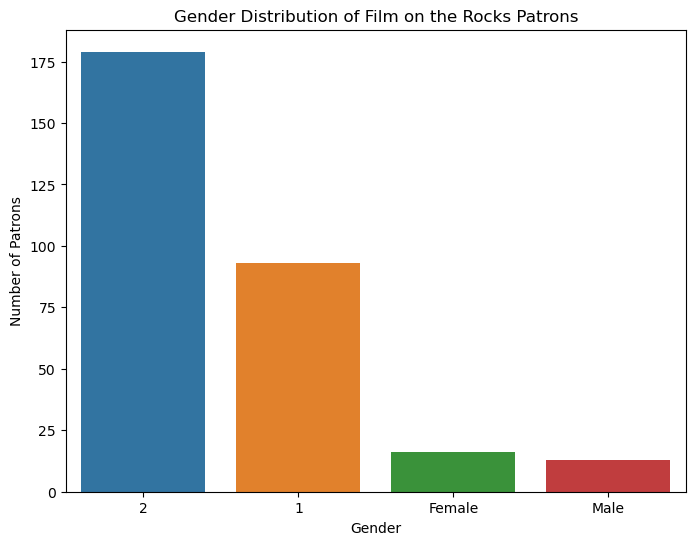

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of male and female patrons
gender_counts = films_df['Gender'].value_counts()

# Visualize the gender distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution of Film on the Rocks Patrons')
plt.xlabel('Gender')
plt.ylabel('Number of Patrons')
plt.show()


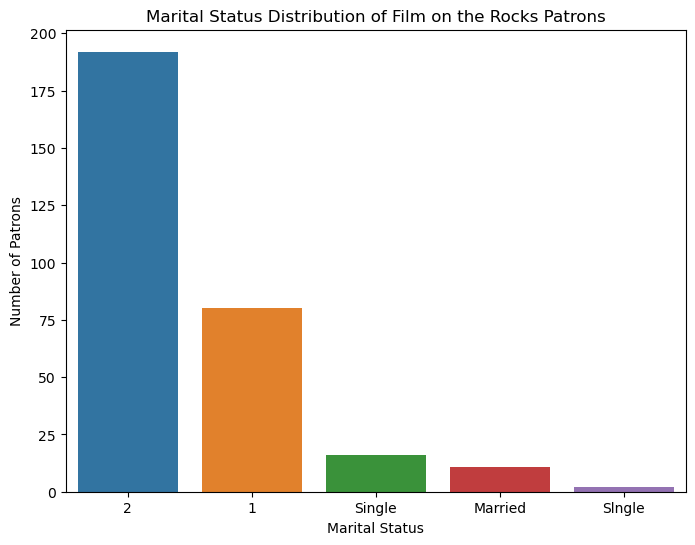

In [86]:
# Count the number of married and single patrons
marital_status_counts = films_df['Marital_Status'].value_counts()

# Visualize the marital status distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=marital_status_counts.index, y=marital_status_counts.values)
plt.title('Marital Status Distribution of Film on the Rocks Patrons')
plt.xlabel('Marital Status')
plt.ylabel('Number of Patrons')
plt.show()


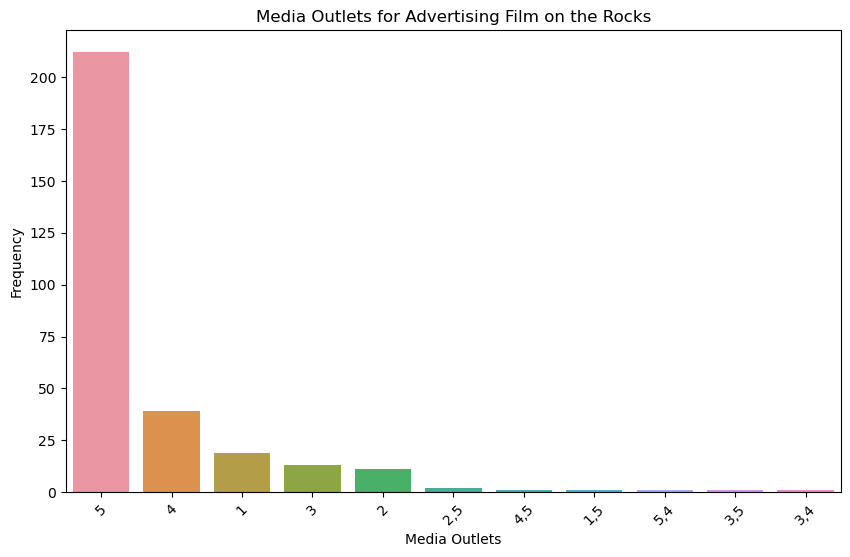

In [87]:
# Count the frequency of each response for "Hear About"
hear_about_counts = films_df['Hear_About'].value_counts()

# Visualize the frequency of each media outlet
plt.figure(figsize=(10, 6))
sns.barplot(x=hear_about_counts.index, y=hear_about_counts.values)
plt.title('Media Outlets for Advertising Film on the Rocks')
plt.xlabel('Media Outlets')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


####Conclusion:

Film on the Rocks patrons generally reported moderate to high satisfaction levels. Marital status and age were significant satisfaction predictors, with most attendees being middle-aged males. Word of mouth was the most effective advertising channel. To enhance satisfaction and attendance, organizers should focus on improving key event aspects, diversifying advertising, and encouraging community engagement for feedback and growth.

By implementing these strategies, Film on the Rocks can improve satisfaction, broaden its audience, and optimize advertising effectiveness.####

